# alg-lib-py
## algs.ipynb by Joseph Loy
## Python library for common and useful algorithms



In [154]:
import numpy as np
import scipy as sp
import pandas as pd
import sys
from timeit import default_timer as timer
import matplotlib as mpl
import matplotlib.pyplot as plt

INTMAX = 2147483647

## Sorting Algorithms

### Mergesort

0.00034380899160169065
0.002453806984703988
0.02424994800821878
0.14985205998527817
1.76985946498462


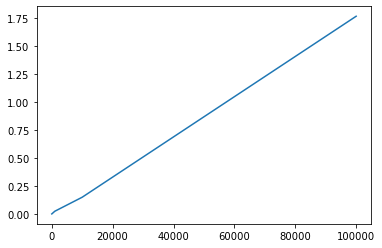

In [155]:
# Take two arrays of length N / 2 and combine them into a sorted array 
# of length N
# Assumes that arr1 and arr2 are already sorted from least to greatest
def merge(A, p, q, r):
    p = int(p)
    q = int(q)
    r = int(r)
    n1 = q - p + 1
    n2 = r - q
    L = np.zeros(n1 + 1)
    R = np.zeros(n2 + 1)
    for i in range(1, n1 + 1):
        L[i - 1] = A[p + i - 1]
    for j in range(1, n2 + 1):
        R[j - 1] = A[q + j]
    L[n1] = INTMAX
    R[n2] = INTMAX
    i = 0
    j = 0
    for k in range(p, r + 1):       
        if L[i] <= R[j]:
            A[k] = L[i]
            i = i + 1
        else:
            A[k] = R[j]
            j = j + 1
    
    return A

# Given an array of length N, split the array into arrays of length 
# N / 2 until sorting is trivial, and recombine subarrays to get 
# the orginal array but sorted. 
def mergesort(A, p, r):
    if p < r:
        q = np.floor((p + r) / 2)
        L = mergesort(A, p, q)
        R = mergesort(A, q + 1, r)
        A = merge(A, p , q, r)
        return A
        
A_10 = np.random.randint(low=-10000, high=10000, size=10)
p10 = 0
r10 = A_10.size - 1
start1 = timer()
mergesort(A_10, p10, r10)
end1 = timer()
time1 = end1 - start1
print(time1) # time in seconds

A_100 = np.random.randint(low=-10000, high=10000, size=100)
p100 = 0
r100 = A_100.size - 1
start2 = timer()
mergesort(A_100, p100, r100)
end2 = timer()
time2 = end2 - start2
print(time2) # time in seconds

A_1000 = np.random.randint(low=-10000, high=10000, size=1000)
p1000 = 0
r1000 = A_1000.size - 1
start3 = timer()
mergesort(A_1000, p1000, r1000)
end3 = timer()
time3 = end3 - start3
print(time3) # time in seconds

A_10000 = np.random.randint(low=-10000, high=10000, size=10000)
p10000 = 0
r10000 = A_10000.size - 1
start4 = timer()
mergesort(A_10000, p10000, r10000)
end4 = timer()
time4 = end4 - start4
print(time4) # time in seconds

A_100000 = np.random.randint(low=-10000, high=10000, size=100000)
p100000 = 0
r100000 = A_100000.size - 1
start5 = timer()
mergesort(A_100000, p100000, r100000)
end5 = timer()
time5 = end5 - start5
print(time5) # time in seconds


fig, ax = plt.subplots()
ax.plot([10, 100, 1000, 10000, 100000], [time1, time2, time3, time4, time5])




## Quicksort

### Heapsort

### Radix Sort 

## Searching Algorithms

### Breadth first search

In [ ]:
def BFS(G, s):
    # For each vertex u in G. V - {s}
    #    u.color = WHITE
    #    u.d = inf
    #    u.pi = NIL
    # s.color = GRAY
    # s.d = 0
    # s.pi = NIL
    # Q = []
    # Enqueue(Q, s)
    # while Q != None:
    #    u = dequeue(Q)
    #    for each v in G. Adj[u]
    #       if v.color == WHITE
    #          v.color = GRAY
    #          v.d = u.d + 1
    #          v.pi = u
    #          ENQUEUE(Q, v)
    #    u.color = BLACK

### Depth first search

In [14]:
def DFS(root, key):
    if root.data == key:
        print("Found the key")
        return
    else:
        leftRoot = root.left
        rightRoot = root.right
        if leftRoot != None:
            DFS(leftRoot, key)
        if rightRoot != None:
            DFS(rightRoot, key)
            
#DFS(root, 4)
DFS(root, 12)

NameError: name 'root' is not defined

### A* Search 

### Iterative deepening A*

### SMA* search